In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind

In [2]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [3]:
# Load dataset
demographics_data = pd.read_csv('demographics_train.csv')
election_data = pd.read_csv('election_train.csv')

In [4]:
# demographics_data.shape

In [5]:
# election_data.shape

In [6]:
# Map State names to abbreviations
demographics_data['State'] = demographics_data['State'].map(us_state_abbrev)

In [7]:
# Convert all counties to lowercase
demographics_data['County'] = demographics_data['County'].str.lower()
election_data['County'] = election_data['County'].str.lower()

In [8]:
# Sort the data by State, County for cleaner output
demographics_data = demographics_data.sort_values(by=['State','County'])
election_data = election_data.sort_values(by=['State','County'])

In [9]:
# Remove 'County' from county names
for i in range(len(election_data['County'])):
    election_data['County'][i] = election_data['County'][i].replace(' county', '')

c:\users\shawn john\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
# Task 1

In [21]:
election_wide_data = pd.pivot_table(election_data, index=['Year','State','County','Office'], columns='Party', values='Votes').reset_index()

In [22]:
election_wide_data.shape

(1205, 6)

In [23]:
# Task 2

In [24]:
merged_data = pd.merge(demographics_data, election_wide_data, left_index=True, on = ['State','County'], how='inner');

In [25]:
merged_data.head()

,State,County,FIPS,Total Population,Citizen Voting-Age Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,...,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Year,Office,Democratic,Republican
0,AZ,apache,4001,72346,0,18.571863,0.486551,5.947806,1.719515,50.598513,...,13.322091,32460,15.807433,21.758252,88.941063,74.061076,2018,US Senator,16298.0,7810.0
1,AZ,cochise,4003,128177,92915,56.299492,3.714395,34.403208,11.458374,49.069646,...,19.756275,45383,8.567108,13.409171,76.837055,36.301067,2018,US Senator,17383.0,26929.0
2,AZ,coconino,4005,138064,104265,54.619597,1.342855,13.711033,4.825298,50.581614,...,10.873943,51106,8.238305,11.085381,65.791439,31.466066,2018,US Senator,34240.0,19249.0
3,AZ,gila,4007,53179,0,63.222325,0.552850,18.548675,4.249798,50.296170,...,26.397638,40593,12.129932,15.729958,82.262624,41.062000,2018,US Senator,7643.0,12180.0
4,AZ,graham,4009,37529,0,51.461536,1.811932,32.097844,4.385942,46.313518,...,12.315809,47422,14.424104,14.580797,86.675944,46.437399,2018,US Senator,3368.0,6870.0


In [26]:
merged_data.shape

(1200, 21)

In [27]:
# Task 3

In [28]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 1204
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   State                                  1200 non-null   object 
 1   County                                 1200 non-null   object 
 2   FIPS                                   1200 non-null   int64  
 3   Total Population                       1200 non-null   int64  
 4   Citizen Voting-Age Population          1200 non-null   int64  
 5   Percent White, not Hispanic or Latino  1200 non-null   float64
 6   Percent Black, not Hispanic or Latino  1200 non-null   float64
 7   Percent Hispanic or Latino             1200 non-null   float64
 8   Percent Foreign Born                   1200 non-null   float64
 9   Percent Female                         1200 non-null   float64
 10  Percent Age 29 and Under               1200 non-null   float64
 11  Perc

In [29]:
# Task 4

In [30]:
merged_data.isnull().sum()

State                                    0
County                                   0
FIPS                                     0
Total Population                         0
Citizen Voting-Age Population            0
Percent White, not Hispanic or Latino    0
Percent Black, not Hispanic or Latino    0
Percent Hispanic or Latino               0
Percent Foreign Born                     0
Percent Female                           0
Percent Age 29 and Under                 0
Percent Age 65 and Older                 0
Median Household Income                  0
Percent Unemployed                       0
Percent Less than High School Degree     0
Percent Less than Bachelor's Degree      0
Percent Rural                            0
Year                                     0
Office                                   0
Democratic                               3
Republican                               2
dtype: int64

In [31]:
bool1 = pd.isnull(merged_data['Republican'])
merged_data[bool1]

,State,County,FIPS,Total Population,Citizen Voting-Age Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,...,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Year,Office,Democratic,Republican
753,TX,bee,48025,32706,0,32.660674,7.989360,57.909864,4.344769,39.579894,...,11.514707,44005,6.065048,28.602944,91.094503,42.977308,2018,US Senator,2811.0,NaN
1119,WI,lafayette,55065,16793,0,94.771631,0.339427,3.507414,2.286667,49.199071,...,16.709343,53038,2.998885,10.123457,82.336861,100.000000,2018,US Senator,3592.0,NaN


In [32]:
bool2 = pd.isnull(merged_data['Democratic'])
merged_data[bool2]

,State,County,FIPS,Total Population,Citizen Voting-Age Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,...,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Year,Office,Democratic,Republican
425,NE,lancaster,31109,301707,0,82.659667,3.783472,6.531834,7.523856,49.891782,...,12.175057,53730,4.372984,6.636272,62.697684,8.253126,2018,US Senator,NaN,49449.0
716,TN,meigs,47121,11804,0,94.713656,1.330058,1.465605,1.067435,50.626906,...,19.662826,35209,12.544170,21.141176,91.176471,100.000000,2018,US Senator,NaN,2694.0
869,TX,menard,48327,2163,0,56.310680,1.248266,39.389736,4.299584,46.833102,...,22.468793,37917,8.360836,21.113990,84.909326,100.000000,2018,US Senator,NaN,632.0


In [33]:
# Task 5

In [34]:
# Create a new boolean column where value = true if # of Democratic votes is greater than Republican votes, else false
merged_data['Party'] = merged_data.apply(lambda row: row.Democratic > row.Republican, axis=1)

# Map true, false values of the new column to 1, 0
merged_data['Party'] = merged_data['Party'].astype(int)

In [35]:
merged_data.head()

,State,County,FIPS,Total Population,Citizen Voting-Age Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,...,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Year,Office,Democratic,Republican,Party
0,AZ,apache,4001,72346,0,18.571863,0.486551,5.947806,1.719515,50.598513,...,32460,15.807433,21.758252,88.941063,74.061076,2018,US Senator,16298.0,7810.0,1
1,AZ,cochise,4003,128177,92915,56.299492,3.714395,34.403208,11.458374,49.069646,...,45383,8.567108,13.409171,76.837055,36.301067,2018,US Senator,17383.0,26929.0,0
2,AZ,coconino,4005,138064,104265,54.619597,1.342855,13.711033,4.825298,50.581614,...,51106,8.238305,11.085381,65.791439,31.466066,2018,US Senator,34240.0,19249.0,1
3,AZ,gila,4007,53179,0,63.222325,0.552850,18.548675,4.249798,50.296170,...,40593,12.129932,15.729958,82.262624,41.062000,2018,US Senator,7643.0,12180.0,0
4,AZ,graham,4009,37529,0,51.461536,1.811932,32.097844,4.385942,46.313518,...,47422,14.424104,14.580797,86.675944,46.437399,2018,US Senator,3368.0,6870.0,0


In [36]:
# Task 6

In [37]:
merged_data[merged_data['Party']==1]['Median Household Income'].mean()

53798.732307692306

In [38]:
merged_data[merged_data['Party']==0]['Median Household Income'].mean()

48724.15085714286

In [39]:
merged_data[merged_data['Party']==1]['Median Household Income'].std()

15289.130077404623

In [40]:
merged_data[merged_data['Party']==0]['Median Household Income'].std()

10659.814624059902

In [41]:
# Resource I used for calculating p value
# https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce

In [42]:
ttest_ind(merged_data[merged_data['Party']==1]['Median Household Income'], merged_data[merged_data['Party']==0]['Median Household Income'])


Ttest_indResult(statistic=6.462503854229826, pvalue=1.4949765852641108e-10)

In [43]:
# Task 7

In [44]:
merged_data[merged_data['Party']==1]['Total Population'].mean()

300998.3169230769

In [45]:
merged_data[merged_data['Party']==0]['Total Population'].mean()

53974.214857142855

In [46]:
merged_data[merged_data['Party']==1]['Total Population'].std()

553600.02571233

In [47]:
merged_data[merged_data['Party']==0]['Total Population'].std()

94334.09097825087

In [48]:
ttest_ind(merged_data[merged_data['Party']==1]['Total Population'], merged_data[merged_data['Party']==0]['Total Population'])


Ttest_indResult(statistic=12.719761654457653, pvalue=7.375503043345805e-35)

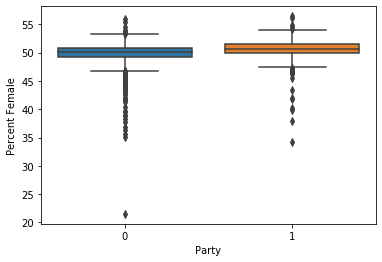

In [49]:
merged_data.groupby(['Party'])
sns.boxplot(x='Party',y='Percent Female',data= merged_data)


In [61]:
ethnicityWhite = merged_data[["Percent White, not Hispanic or Latino","Party"]]

In [62]:
ethnicityWhite.head()

,"Percent White, not Hispanic or Latino",Party
0,18.571863,1
1,56.299492,0
2,54.619597,1
3,63.222325,0
4,51.461536,0


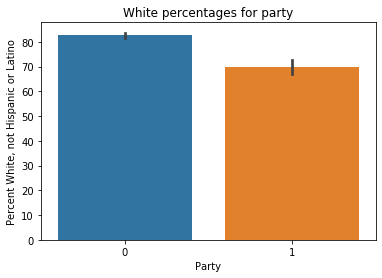

In [67]:
ax = sns.barplot(x="Party", y="Percent White, not Hispanic or Latino", data=ethnicityWhite).set_title("White percentages for party")

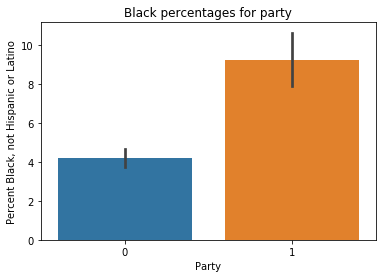

In [68]:
ethnicityBlack = merged_data[["Percent Black, not Hispanic or Latino","Party"]]
ax = sns.barplot(x="Party", y="Percent Black, not Hispanic or Latino", data=ethnicityBlack).set_title("Black percentages for party")

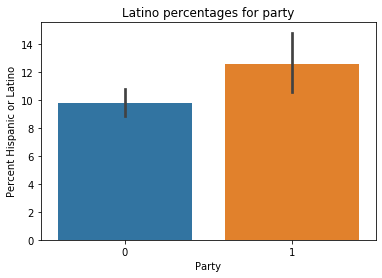

In [69]:
ethnicityLatino = merged_data[["Percent Hispanic or Latino","Party"]]
ax = sns.barplot(x="Party", y="Percent Hispanic or Latino", data=ethnicityLatino).set_title("Latino percentages for party")

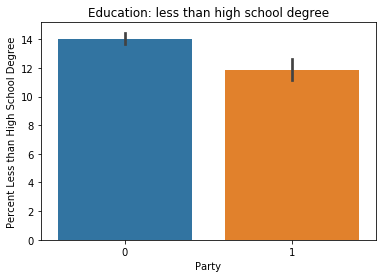

In [72]:
highschoolEd = merged_data[["Percent Less than High School Degree","Party"]]
ax = sns.barplot(x="Party", y="Percent Less than High School Degree", data=highschoolEd).set_title("Education: less than high school degree")

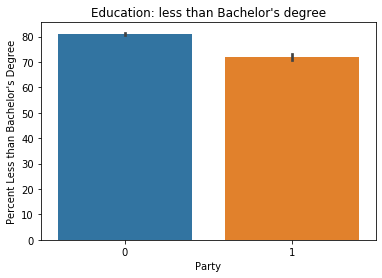

In [73]:
collegeEd = merged_data[["Percent Less than Bachelor's Degree","Party"]]
ax = sns.barplot(x="Party", y="Percent Less than Bachelor's Degree", data=collegeEd).set_title("Education: less than Bachelor's degree")

The first boxplot shows us that both parties have a median percentage of around 50%. Which makes sense because this doesn't show the percentage of females for the party but rather the percentage of females in a county that is republican or democratic. So logically speaking most counties are going to have an even ratio of male to female. So then inherently, no matter if a county is more democratic or more republican, the percentages will be even. Next up we have the percentage of white people in a party. We see for the counties that are "0" ie republican that the percentage is higher for the amount of white people compared to democratic parties. The error bars don't overlap so there is high degree of confidence that counties which are republican will have a high percentage of white people. Next is the black ethnicity. We see that "1" which is democratic has a higher percentage than the republican which means most counties that are democratic will most likely have a high percentage of african americans. Since the error bars don't overlap we can say with high degree of confidence that african americans tend to be in favor of the democratic party. Next is hispanics. If we look at the bars alone we would probably say that hispanics would tend to vote for the democratic party. However the bars error bars overlap. Which means that true height of those bars could be anywhere in the error bars. And since they overlap it could mean the true height is the same for both. So we can't say with a high degree of confidence that if a county is democratic they will have larger percentage of hispanics compared to a republican party. 
The next variable is highschool education and college education. For both categories republicans have a substantial lead on the democrats.And for both categories the error bars don't overlap. Which shows counties that are republican have more people that have less than a highschool degree and have more people that have less than a college degree. Which we then can conclude that people with less than a college and/or highschool degree are more likely to be in favor of the republican platform.